
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Mario Mallea

**Rol**: 2017105151

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [4]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Todas sus columnas son numericas 

In [6]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

In [7]:
numeric_features = list(digits.dtypes[digits.dtypes != "object"].index)
print(numeric_features)

['c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'target']


Graficamos los histogramas de los 65 atributos para entender como se distribuyen

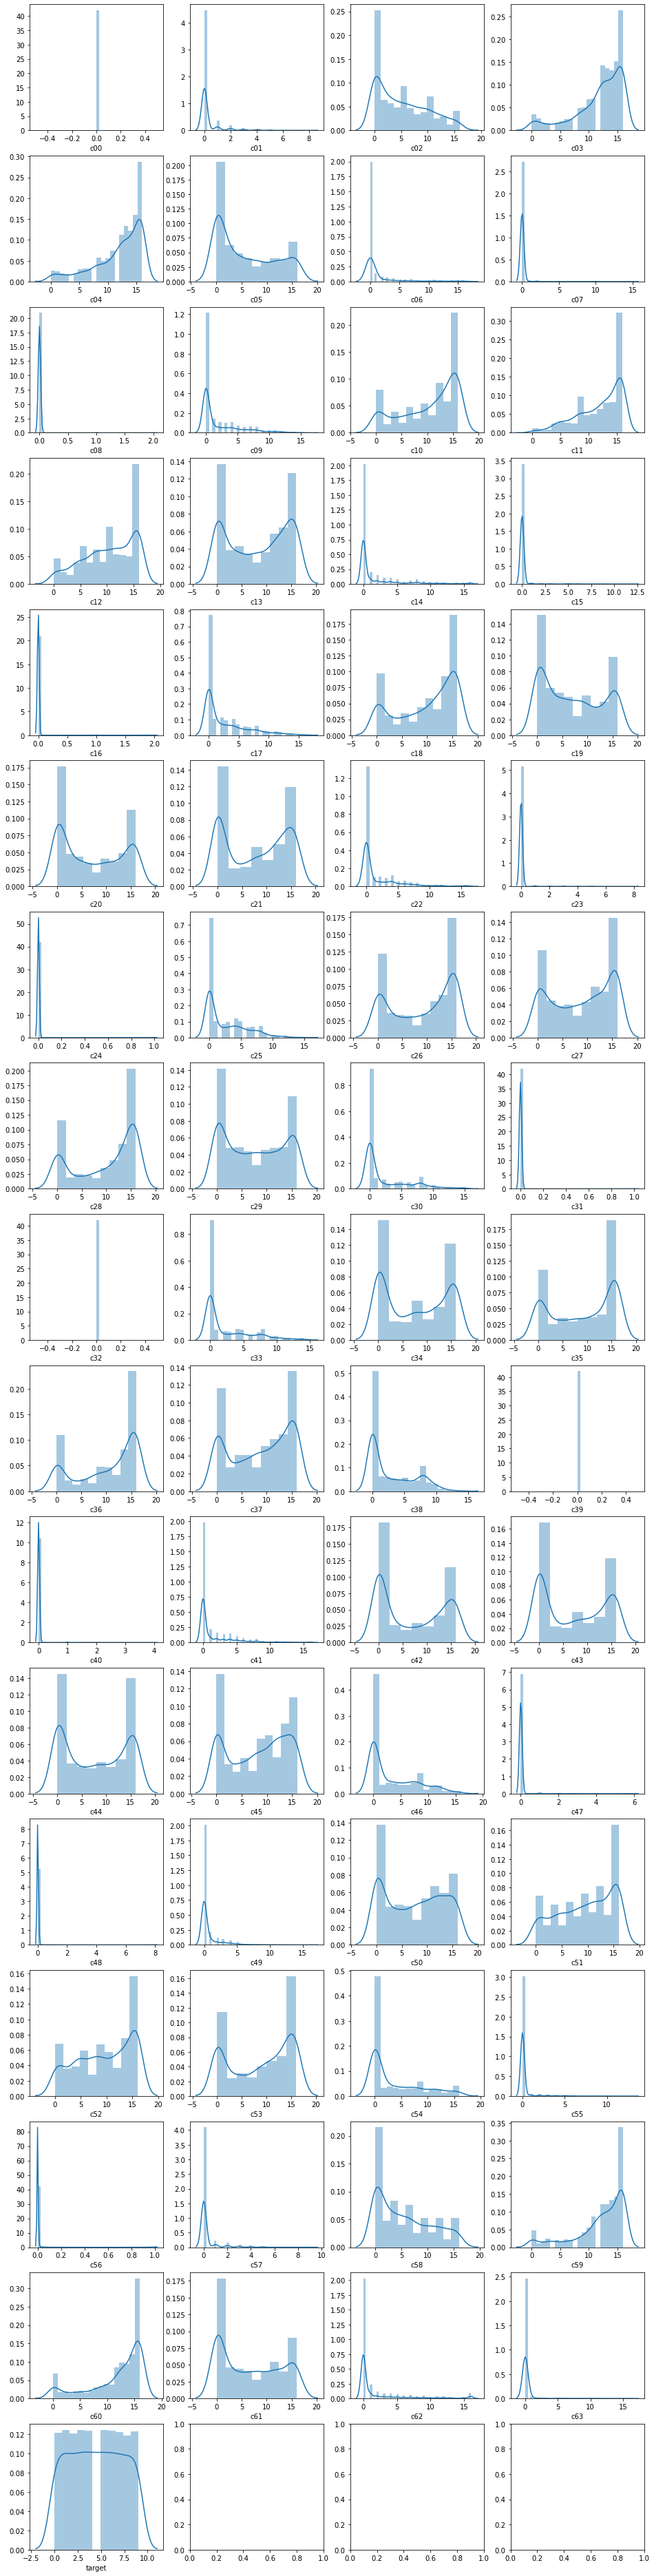

In [8]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

n_show = digits.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(digits.columns[:n_show]):
  sns.distplot(digits[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()


Vemos que en su mayoría están sesgados a ser ceros.

In [9]:
digits.target.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

Las clases están balanceadas

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [10]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

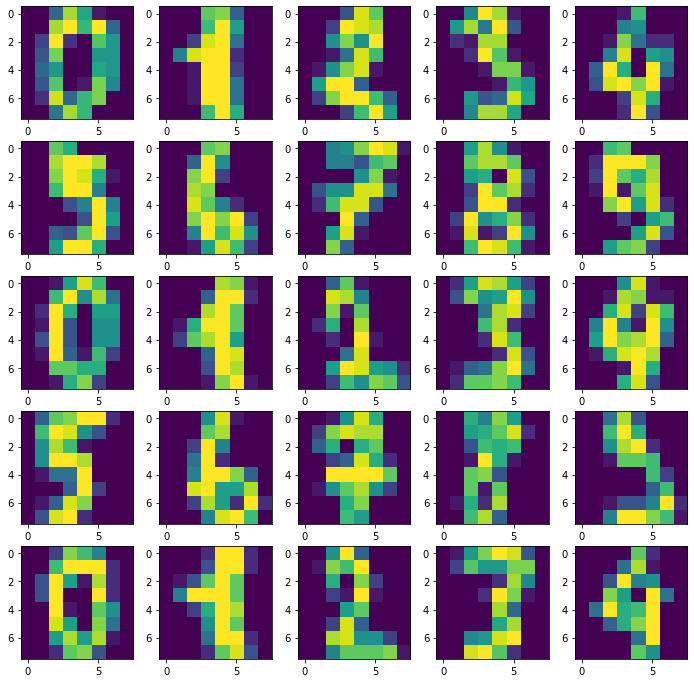

In [11]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(25):
    axs[i//5,i%5].imshow(digits_dict["images"][i])

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


Regresión logistica:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Observaciones entrenamiento 1437 Observaciones de test 360
Valor óptimo: 0.954063 con {'C': 1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



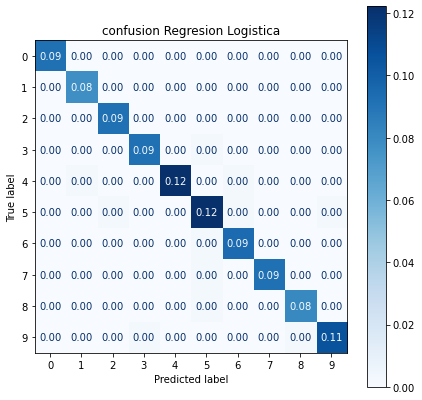

In [13]:
X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Observaciones entrenamiento",X_train.shape[0],"Observaciones de test",X_test.shape[0])

hiperparametros = {'penalty':['l1','l2','elasticnet'], 'C': range(0,10)} ## valores a probar

clf = LogisticRegression(random_state=0)
grid = GridSearchCV(clf, hiperparametros) 
grid_result = grid.fit(X_train, y_train)

print("Valor óptimo: %f con %s" % (grid_result.best_score_, grid_result.best_params_))

clf_mejor= LogisticRegression(penalty= grid_result.best_params_["penalty"],C=grid_result.best_params_["C"],random_state=0)
clf_mejor.fit(X_train,y_train)
y_pred= clf_mejor.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7))
disp = plot_confusion_matrix(clf_mejor, X_test, y_test,display_labels=digits.target.unique(), cmap=plt.cm.Blues,normalize='all',values_format= '.2f',ax=ax)
disp.ax_.set_title("confusion Regresion Logistica")

print(classification_report(y_test, y_pred))

K vecinos mas cercanos

Observaciones entrenamiento 1437 Observaciones de test 360
Valor óptimo: 0.986779 con {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     0.9655    1.0000    0.9825        28
           2     1.0000    1.0000    1.0000        33
           3     0.9714    1.0000    0.9855        34
           4     0.9787    1.0000    0.9892        46
           5     0.9787    0.9787    0.9787        47
           6     0.9722    1.0000    0.9859        35
           7     1.0000    0.9706    0.9851        34
           8     1.0000    0.9667    0.9831        30
           9     0.9737    0.9250    0.9487        40

    accuracy                         0.9833       360
   macro avg     0.9840    0.9841    0.9839       360
weighted avg     0.9835    0.9833    0.9832       360



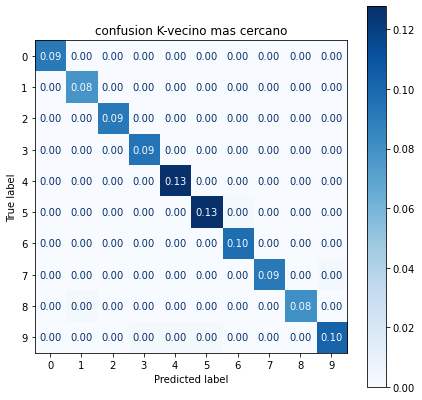

In [14]:
X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Observaciones entrenamiento",X_train.shape[0],"Observaciones de test",X_test.shape[0])

hiperparametros = {'weights':['uniform', 'distance'], 'n_neighbors': range(0,10)} ## valores a probar

clf = KNeighborsClassifier()
grid = GridSearchCV(clf, hiperparametros) 
grid_result = grid.fit(X_train, y_train)

print("Valor óptimo: %f con %s" % (grid_result.best_score_, grid_result.best_params_))

clf_mejor= KNeighborsClassifier(n_neighbors=grid_result.best_params_["n_neighbors"],weights= grid_result.best_params_["weights"])
clf_mejor.fit(X_train,y_train)
y_pred= clf_mejor.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7))
disp = plot_confusion_matrix(clf_mejor, X_test, y_test,display_labels=digits.target.unique(), cmap=plt.cm.Blues,normalize='all',values_format= '.2f',ax=ax)
disp.ax_.set_title("confusion K-vecino mas cercano")

print(classification_report(y_test, y_pred,digits=4))

SVM

Observaciones entrenamiento 1437 Observaciones de test 360
Valor óptimo: 0.991655 con {'C': 7, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



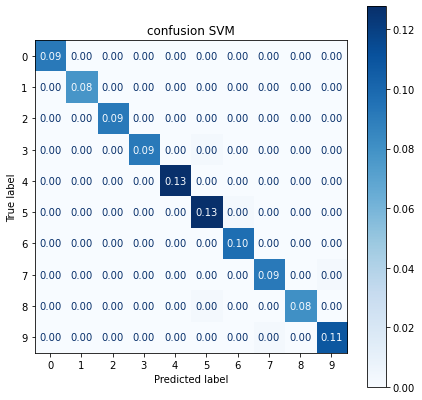

In [15]:
X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Observaciones entrenamiento",X_train.shape[0],"Observaciones de test",X_test.shape[0])

hiperparametros = {'C': range(1,10),'kernel':['rbf','linear','poly']} ## valores a probar

clf = SVC()
grid = GridSearchCV(clf, hiperparametros) 
grid_result = grid.fit(X_train, y_train)

print("Valor óptimo: %f con %s" % (grid_result.best_score_, grid_result.best_params_))

clf_mejor= SVC(C=grid_result.best_params_["C"],kernel= grid_result.best_params_["kernel"])
clf_mejor.fit(X_train,y_train)
y_pred= clf_mejor.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7))
disp = plot_confusion_matrix(clf_mejor, X_test, y_test,display_labels=digits.target.unique(), cmap=plt.cm.Blues,normalize='all',values_format= '.2f',ax=ax)
disp.ax_.set_title("confusion SVM")

print(classification_report(y_test, y_pred))

Como el problema no es demasiado grande los tres modelos corren de forma casi automatica, el mejor fue SVM con margen blando regularizado por 7 y kernel gaussiano, tanto en acurracy como en micro y macro f1 score.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [16]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='rbf', C=7)
scores = cross_val_score(clf, X, y, cv=10)
print("intervalo de confianza para el Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

intervalo de confianza para el Accuracy: 0.98 (+/- 0.03)


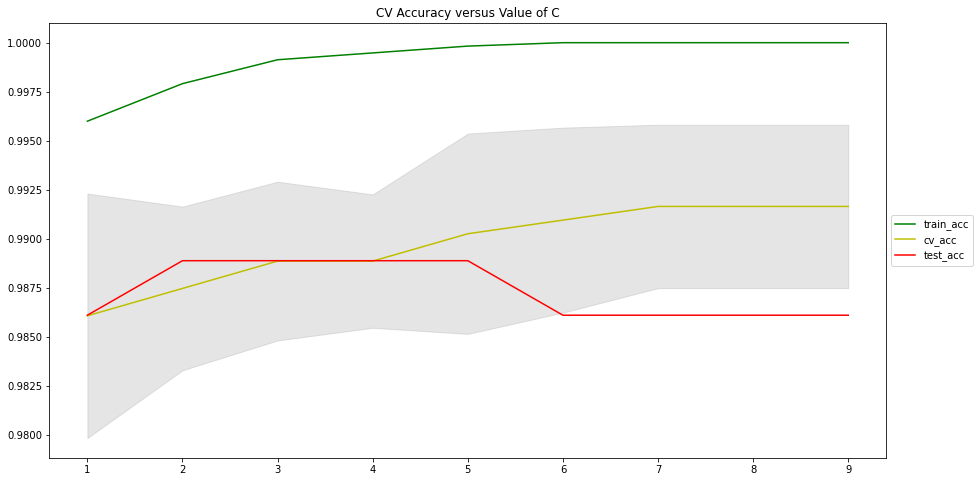

In [17]:
parameters = {'kernel':['rbf'], 'C': np.arange(1,10)}
svm = SVC()
gs = GridSearchCV(svm, parameters,return_train_score=True)
gs.fit(X_train,y_train)
C_values= np.arange(1,10)
test_accuracy = []
for C_val in C_values:
  svm = SVC(kernel='rbf', C=C_val)
  svm.fit(X_train,y_train)
  test_accuracy.append(svm.score(X_test,y_test))


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(C_values,gs.cv_results_['mean_train_score'],color='g',lw=1.5,label='train_acc')
ax.plot(C_values,gs.cv_results_['mean_test_score'],color='y',lw=1.5,label='cv_acc')
ax.plot(C_values,test_accuracy,color='r',lw=1.5,label='test_acc')
plt.fill_between(C_values, gs.cv_results_['mean_test_score']-gs.cv_results_['std_test_score'], gs.cv_results_['mean_test_score']+gs.cv_results_['std_test_score'],color='gray', alpha=0.2)
plt.title("CV Accuracy versus Value of C")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

En un caso real solo podríamos graficar las curvas de acurracy de train y validation, luego la idea es decidir a partir del validation set, en ese sentido podríamos elegir 3 como alza del validatio lo cual funcionaría bien pues el test se mantiene en su máximo valor, óptimo sería 2 pero no sería detectable a priori. 

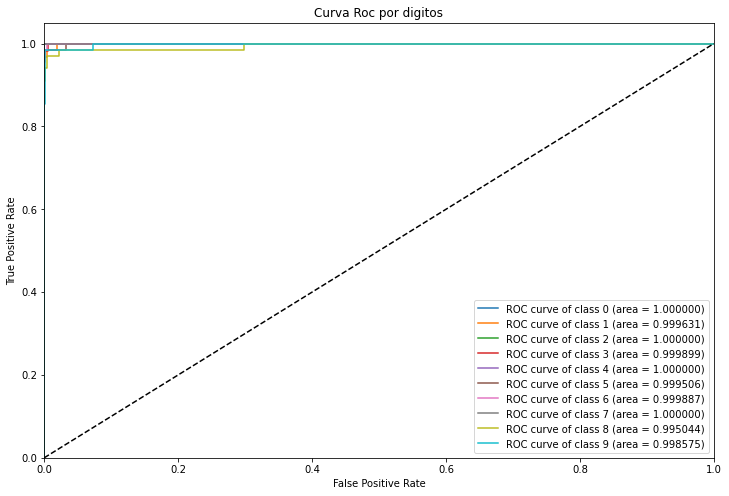

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(SVC(kernel='rbf', C=7))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=[12,8])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc por digitos')
plt.legend(loc="lower right")
plt.show()

Para todos los numericos el modelo clasifica casi perfecto

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [1]:
63-22

41

Si vemos el EDA al rededor de 22 son atributos que solo contienen ceros por lo que no deberían ser explicativos, por esta razón usaré un kbest de 62-22= 41 mejores atributos

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Separamos las columnas objetivo

# Aplicando el algoritmo univariante de prueba F.
k = 41  # número de atributos a seleccionar
seleccionadas = SelectKBest(f_classif, k=k).fit(X_train, y_train)

C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [15]:
catrib = seleccionadas.get_support()
atributos = [digits.columns[i] for i in list(catrib.nonzero()[0])] ## columnas importantes
atributos

['c02',
 'c03',
 'c05',
 'c06',
 'c09',
 'c10',
 'c13',
 'c17',
 'c18',
 'c19',
 'c20',
 'c21',
 'c22',
 'c25',
 'c26',
 'c27',
 'c28',
 'c29',
 'c30',
 'c33',
 'c34',
 'c35',
 'c36',
 'c37',
 'c38',
 'c41',
 'c42',
 'c43',
 'c44',
 'c45',
 'c46',
 'c50',
 'c51',
 'c52',
 'c53',
 'c54',
 'c58',
 'c59',
 'c60',
 'c61',
 'c62']

In [27]:
digits_41_best=digits[atributos]

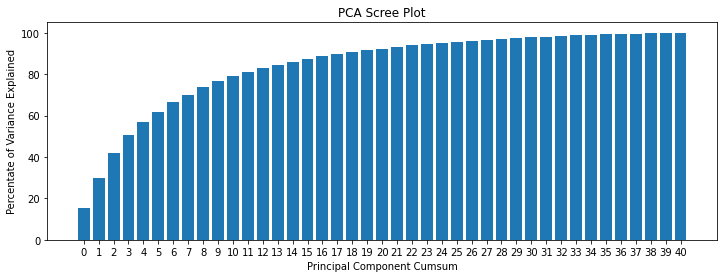

In [30]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=41)
principalComponents = pca.fit_transform(digits_41_best)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = [str(x) for x in list(range(41))]

plt.figure(figsize=(12,4))
plt.bar(x= range(1,42), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

segun el criterio de varianza acumulada desde 21 es suficiente ya que esta por sobre el 90%

In [48]:
principalDataframe = pd.DataFrame(data = principalComponents[:,list(range(21))], columns = ['PC'+str(i) for i in range(21)])
targetDataframe = digits[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [49]:
newDataframe

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,-2.858154,21.910657,-7.610982,14.139074,-5.405816,-6.720590,2.696409,3.302387,0.701365,-3.686973,...,-4.335050,-0.431603,0.792621,2.004148,2.027119,1.808744,-4.672324,3.412475,0.669913,0
1,9.678509,-19.912325,2.801764,-14.424630,6.574480,-5.739814,3.008620,-5.628509,2.793186,2.210750,...,-5.231213,8.961867,-0.746873,-0.471558,1.476075,-6.580810,2.349762,5.064005,-1.849663,1
2,7.393181,-8.970243,2.345356,-11.496446,-17.752752,-8.219064,2.344683,-14.996146,-1.278873,-4.976939,...,7.788946,-2.683410,2.986686,-6.973667,-3.799012,3.843673,-2.409122,-1.712637,-4.172053,2
3,-15.495936,1.944537,9.432426,-12.214386,6.881507,2.953251,0.220102,11.580342,2.408373,-5.892429,...,-5.610692,-0.625105,-0.639377,2.826049,1.906026,0.191590,-2.090107,1.920048,4.120454,3
4,24.401968,6.179789,-4.088832,-12.933190,-0.264023,-4.476037,1.228339,13.659597,3.818962,-10.949468,...,4.319307,6.513287,5.962615,6.100843,-2.677563,-3.154495,-0.051967,-7.711354,4.121313,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-15.176724,13.879573,-13.319404,-6.283645,4.059062,-1.487697,-6.074312,-5.088312,3.326477,8.146080,...,-2.366427,1.947988,4.963849,0.772731,-0.100676,-1.852654,-1.056549,-1.162880,1.961771,9
1793,5.056755,21.981762,-6.798510,14.356104,-6.098690,-12.684461,4.354317,-0.922161,-8.297486,3.078377,...,6.207061,2.439686,-4.209667,-1.758637,-1.855577,-1.515352,5.012568,2.002686,0.786095,0
1794,10.468399,-6.632695,5.589312,-7.497858,-2.448297,-15.480710,-4.022310,-3.834164,-8.013340,12.337428,...,-0.135839,-2.602819,8.285570,0.524574,4.118951,3.190707,-2.232621,-2.938078,0.947574,8
1795,-5.730121,13.299245,-10.680082,-5.620062,3.899213,2.717669,-5.244899,-6.343622,-3.474214,10.539405,...,-0.693595,4.710635,4.540925,4.089694,4.682138,4.208811,-0.993528,3.765549,1.482271,9


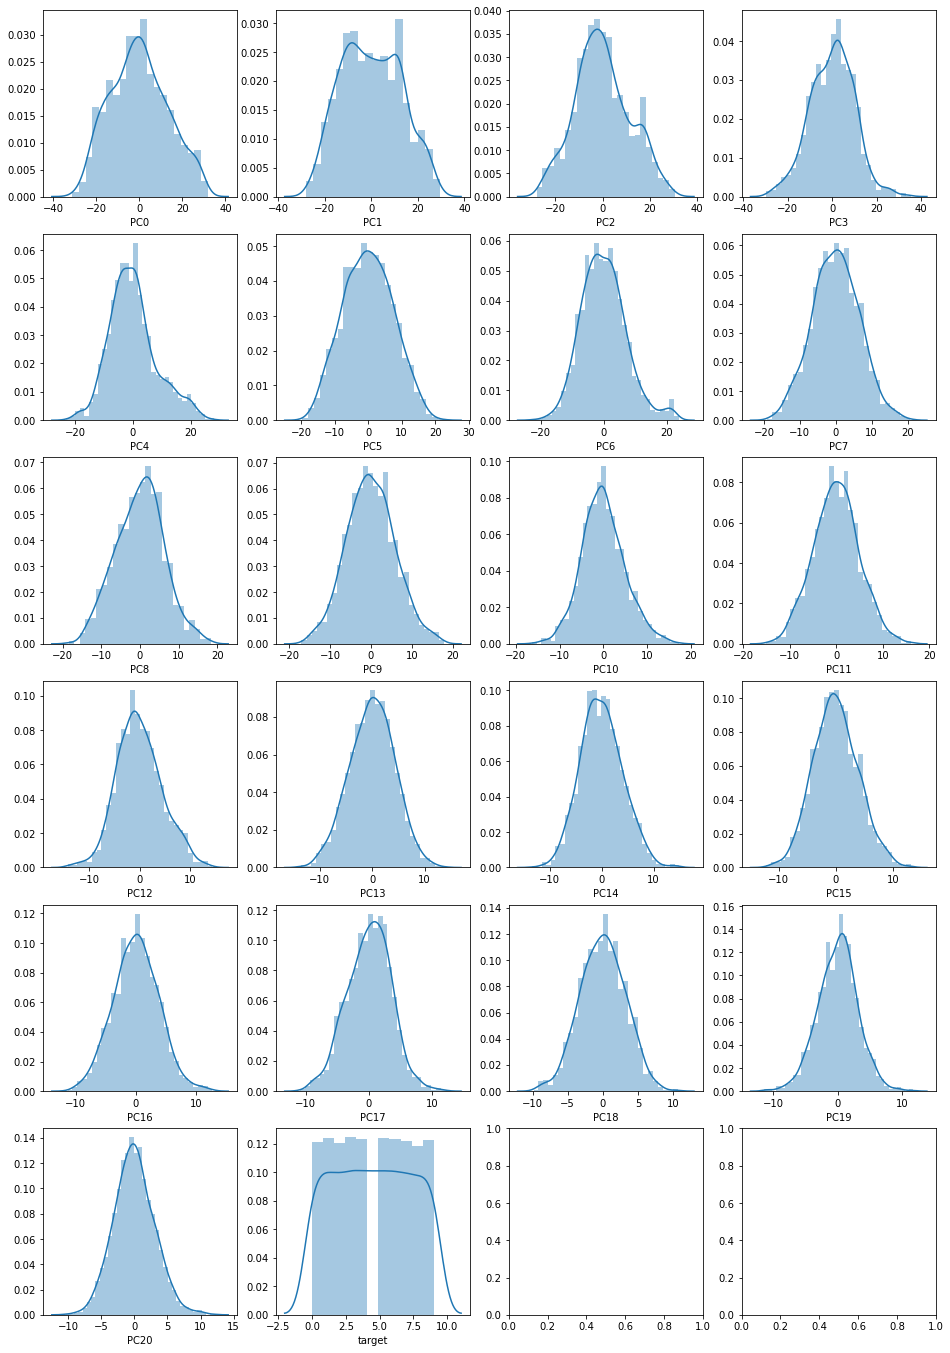

In [78]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

n_show = newDataframe.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(newDataframe.columns[:n_show]):
  sns.distplot(newDataframe[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()


In [84]:
X = newDataframe.drop(columns="target").values
y = newDataframe["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=SVC(kernel='rbf', C=3)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    0.9706    0.9851        34
           4     0.9787    1.0000    0.9892        46
           5     0.9592    1.0000    0.9792        47
           6     1.0000    1.0000    1.0000        35
           7     1.0000    0.9706    0.9851        34
           8     1.0000    0.9667    0.9831        30
           9     0.9750    0.9750    0.9750        40

    accuracy                         0.9889       360
   macro avg     0.9913    0.9883    0.9897       360
weighted avg     0.9892    0.9889    0.9889       360



El modelo sigue siendo muy bueno

Vemos que el nuevo data frame tiene casi solo distribuciones normales por lo que debería ser más fácil trabarlo ya que cualquier estimación funcionará numéricamente mejor. El tiempo de ejecución no es significativo porque el data set es pequeño y en cualquier caso tarda menos de 1 segundo.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [60]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    Y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = Y_pred == Y_test
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = Y_pred != Y_test
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = np.array(Y_test)[mask]
    y_aux_pred = np.array(Y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

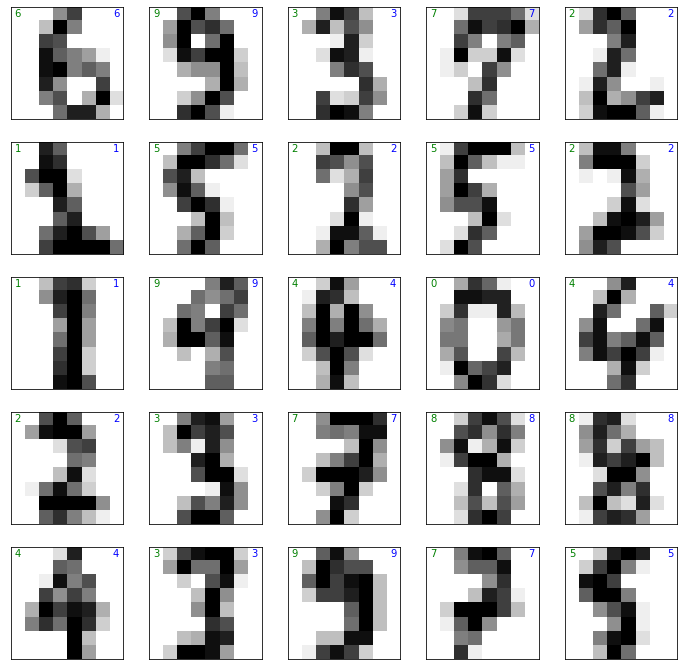

In [75]:
mostar_resultados(digits,SVC(kernel='rbf', C=3),nx=5, ny=5,label = "correctos")

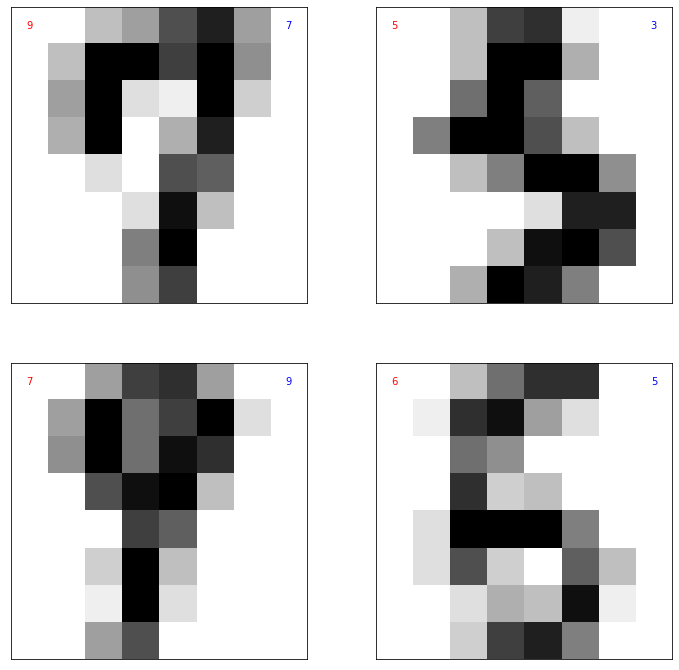

In [77]:
mostar_resultados(digits,SVC(kernel='rbf', C=3),nx=2, ny=2,label = "incorrectos")

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Por ejemplo, tenemos estos 4 casos en los que se equivocó pero los valores supuestamente verdaderos no parecen estar correctos.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En general el modelo funciona bien es decir, la ingeniería de caracteristicas que se llevo a cabo resulta ser excelente para resolver el problema, en este caso la técnica de pixeles es suficiente y no valdría la pena cambiar la metodología.